In [14]:
import pandas as pd
df = pd.read_csv("../data/processed/cleaned_data.csv")


Basic Overview

In [15]:
print(df.shape)          # Rows and columns
print(df.dtypes)         # Data types
print(df.describe())     # Summary stats for numeric columns
print(df.isnull().sum()) # Check for missing values


(39644, 62)
url                              object
timedelta                       float64
n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
                                 ...   
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                            int64
log_shares                      float64
Length: 62, dtype: object
          timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75% 

Target Variable Distribution

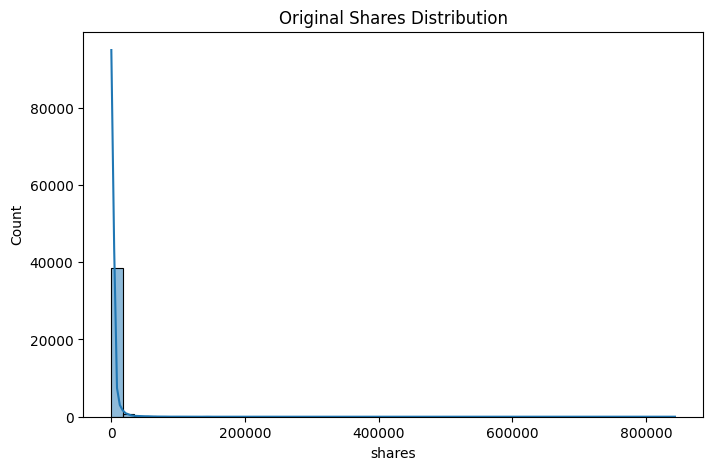

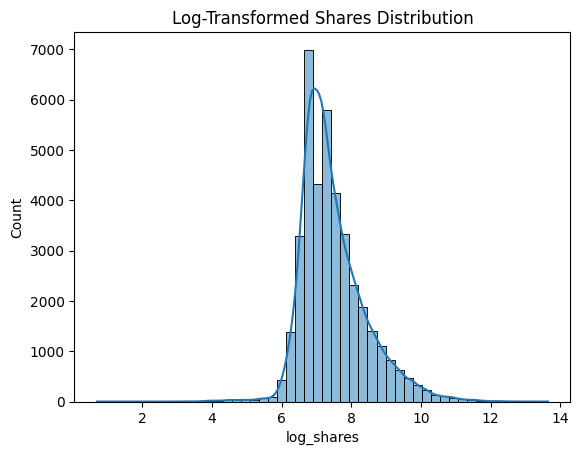

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["shares"], bins=50, kde=True)
plt.title("Original Shares Distribution")
plt.show()

# Log-transformed version (better for modeling)

sns.histplot(df["log_shares"], bins=50, kde=True)
plt.title("Log-Transformed Shares Distribution")
plt.show()


Correlation Heatmap

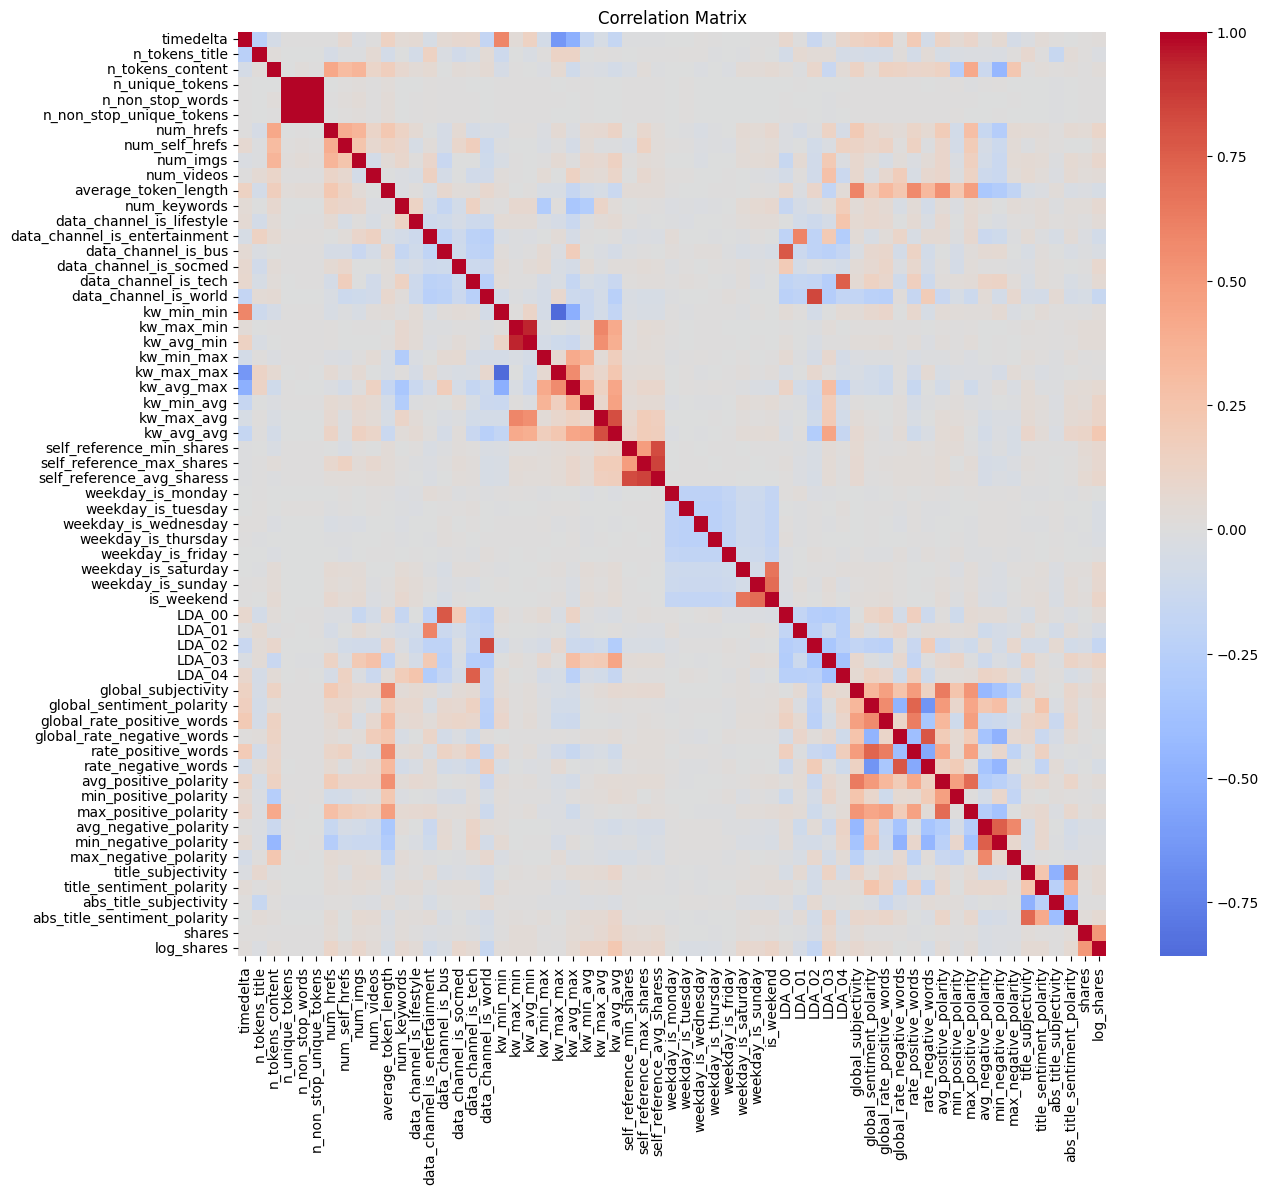

In [17]:
plt.figure(figsize=(14, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()


Pairwise Feature Relationships

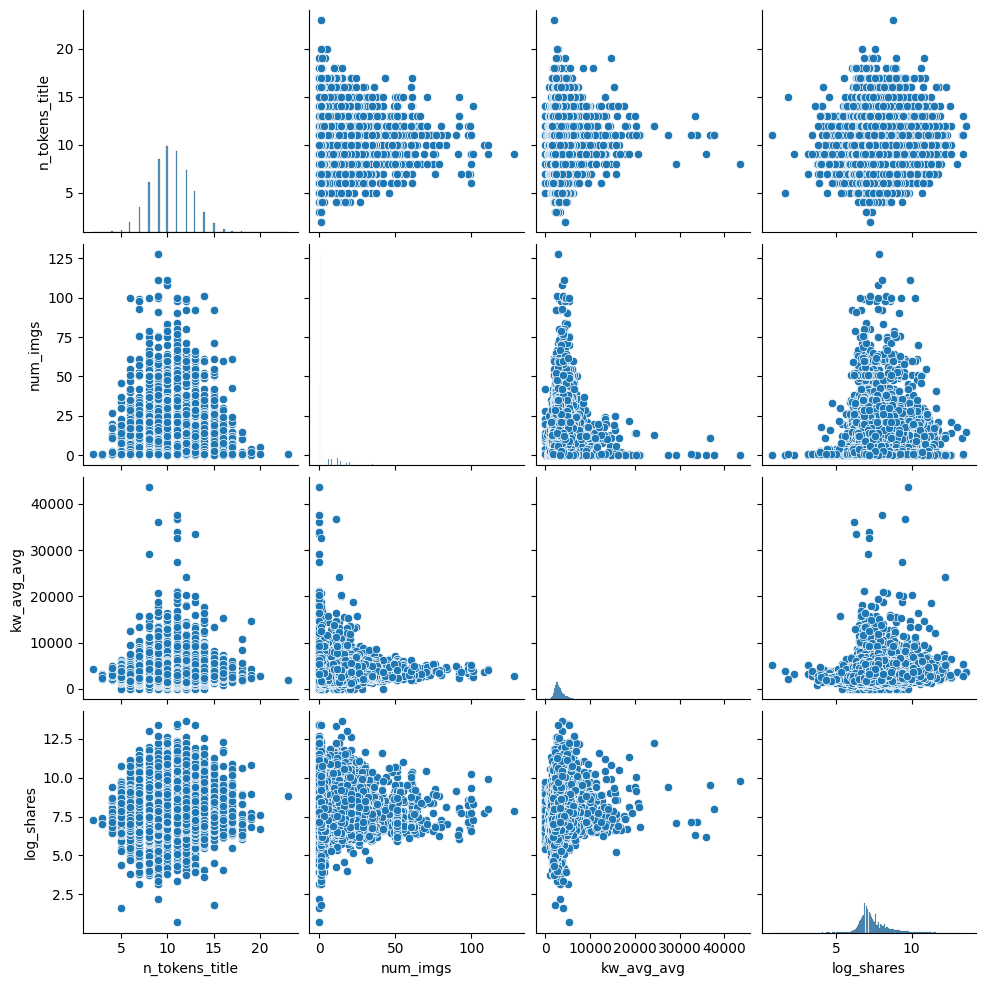

In [18]:
sns.pairplot(df[["n_tokens_title", "num_imgs", "kw_avg_avg", "log_shares"]])
plt.show()


Category Distribution

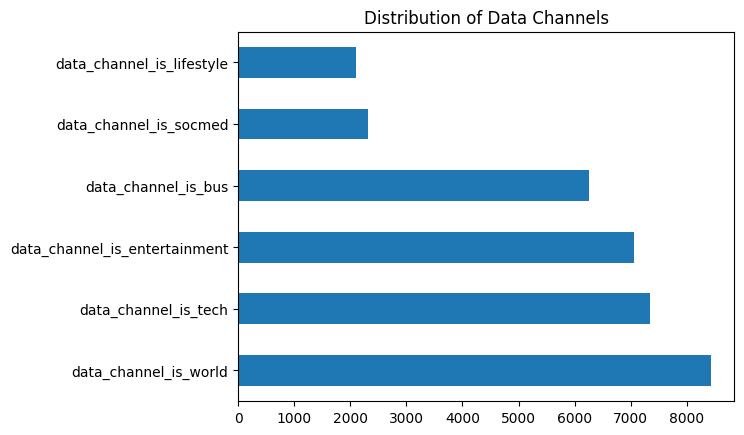

In [19]:
binary_cols = [col for col in df.columns if col.startswith("data_channel")]
df[binary_cols].sum().sort_values(ascending=False).plot(kind="barh")
plt.title("Distribution of Data Channels")
plt.show()


Feature vs Target Relationships

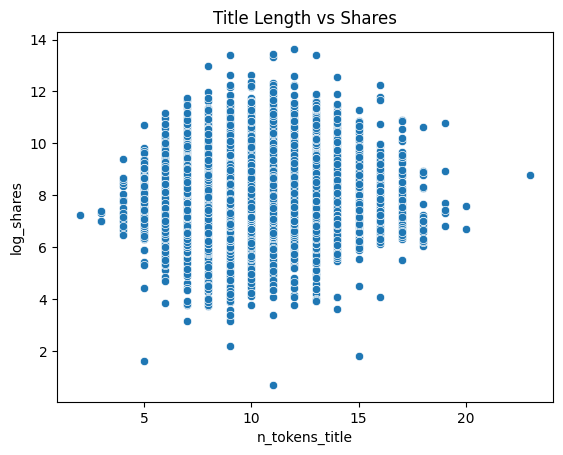

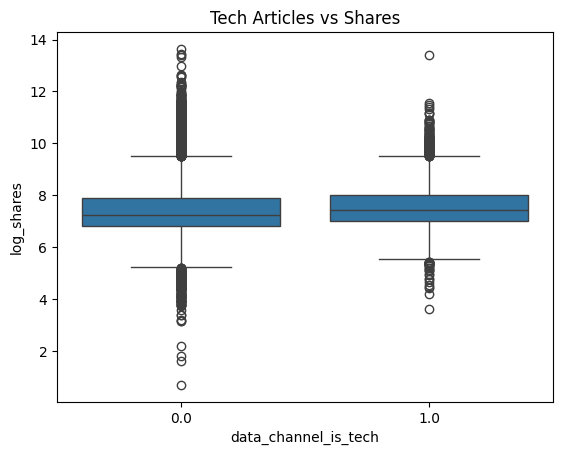

In [20]:
sns.scatterplot(x="n_tokens_title", y="log_shares", data=df)
plt.title("Title Length vs Shares")
plt.show()

sns.boxplot(x="data_channel_is_tech", y="log_shares", data=df)
plt.title("Tech Articles vs Shares")
plt.show()


Outlier Check

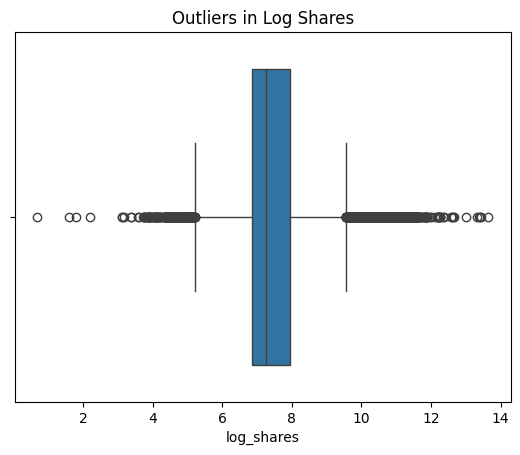

In [21]:
sns.boxplot(x=df["log_shares"])
plt.title("Outliers in Log Shares")
plt.show()
